In [88]:
from PIL import Image, ImageDraw, ImageFont, ImageEnhance, ImageFilter
import requests     # download data from url

In [89]:
# local image
local_image_path = r"C:\Users\HP\OneDrive\Pictures\Screenshots\Screenshot 2023-11-24 183517.png"
# image from url
image_url = 'https://i.natgeofe.com/k/3373927f-fa15-4c55-bf49-73f44073b768/burmese-python-tree_16x9.jpg?w=1200'

<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=724x771 at 0x1A14887AFD0>


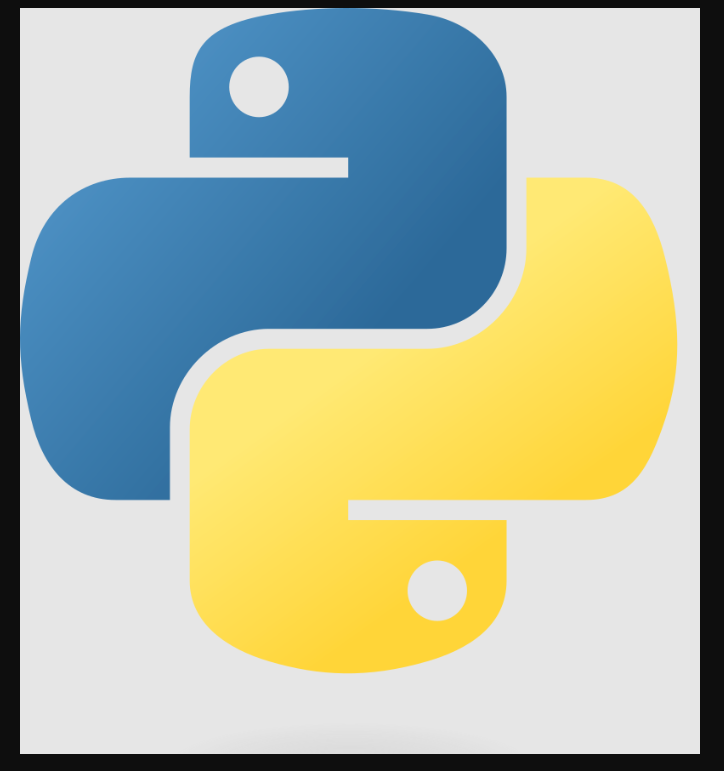

In [90]:
im1 = Image.open(local_image_path)
print(im1)
im1

In [91]:
def get_img_from_url(url):
    response = requests.get(url, stream=True)
    return Image.open(response.raw)

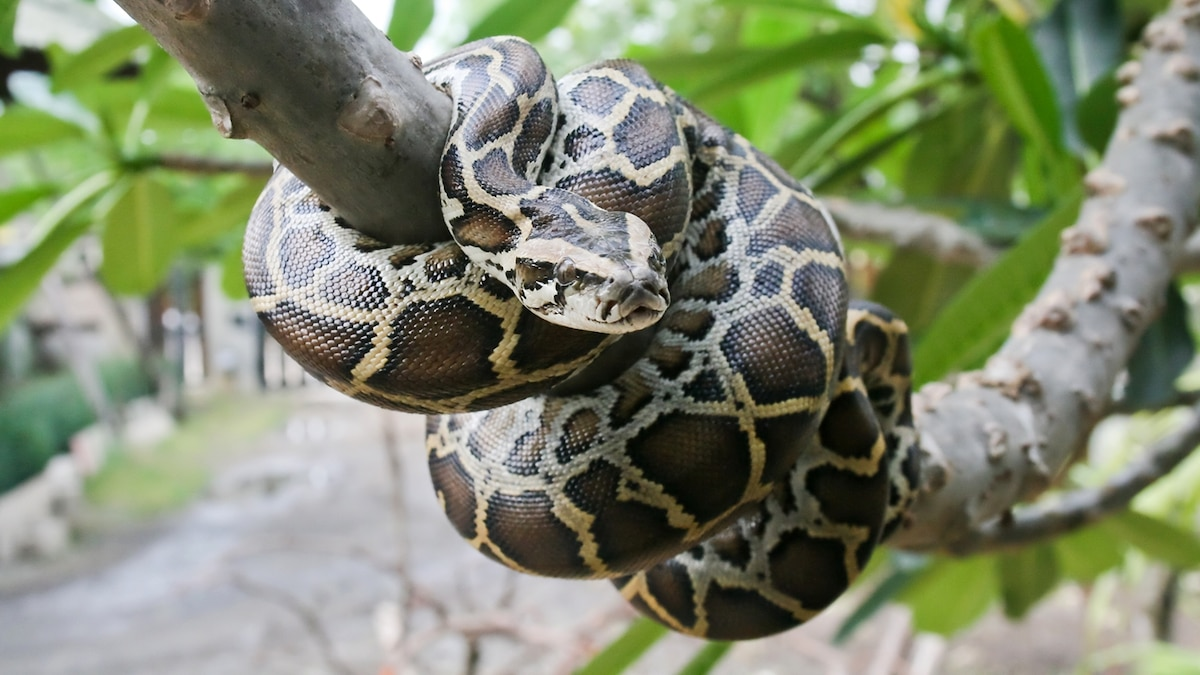

In [92]:
im2 = get_img_from_url(image_url)
im2

In [93]:
print('Image 1')
print('Mode', im1.mode)
print('Format', im1.format)
print('Size', im1.size)
print('Width', im1.width)
print('Height', im1.height)
print('Info for img 1', im1.info)
print('-----------Image 2------------------')
print('Info for img 2', im2.info)

Image 1
Mode RGBA
Format PNG
Size (724, 771)
Width 724
Height 771
Info for img 1 {'srgb': 0, 'gamma': 0.45455, 'dpi': (119.9896, 119.9896)}
-----------Image 2------------------
Info for img 2 {'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 2, 'jfif_density': (118, 118), 'progressive': 1, 'progression': 1, 'icc_profile': b'\x00\x00\x02\x0clcms\x02\x10\x00\x00mntrRGB XYZ \x07\xdc\x00\x01\x00\x19\x00\x03\x00)\x009acspAPPL\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\xf6\xd6\x00\x01\x00\x00\x00\x00\xd3-lcms\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\ndesc\x00\x00\x00\xfc\x00\x00\x00^cprt\x00\x00\x01\\\x00\x00\x00\x0bwtpt\x00\x00\x01h\x00\x00\x00\x14bkpt\x00\x00\x01|\x00\x00\x00\x14rXYZ\x00\x00\x01\x90\x00\x00\x00\x14gXYZ\x00\x00\x01\xa4\x00\x00\x00\x14bXYZ\x00\x00\x01\xb8\x00\x00\x00\x1

In [94]:
print("Image 1 metadeta")
print(im1.getexif())

Image 1 metadeta
{}


## Methods

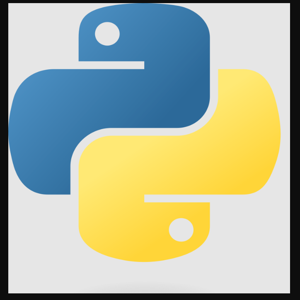

In [95]:
# resize image
im11 = im1.resize((300, 300), resample=Image.BICUBIC)
# im1.resize((200, 200), resample=Image.LANCZOS)
# im1.resize((200, 200), resample=Image.BILINEAR)
im11

In [96]:
im2.size

(1200, 675)

In [97]:
w, h = im2.size
im22 = im2.resize((w//2, h//2), resample=Image.LANCZOS)
# rotate image
# im2.rotate(45)
# im2.rotate(45, fillcolor='white')
# im2.rotate(45, fillcolor='white', expand=True)
# im2.rotate(-90, expand=True)
im22.rotate(-90, expand=True).show()
# im22

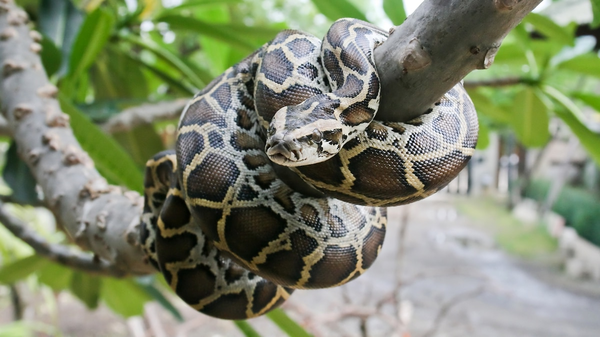

In [98]:
# flip image
im22.transpose(Image.FLIP_LEFT_RIGHT) 

In [99]:
print(im11.size)

(300, 300)


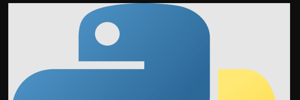

In [100]:
# crop image
im11.crop((0,0,im11.width, 100))        # starting point, ending point, height, width

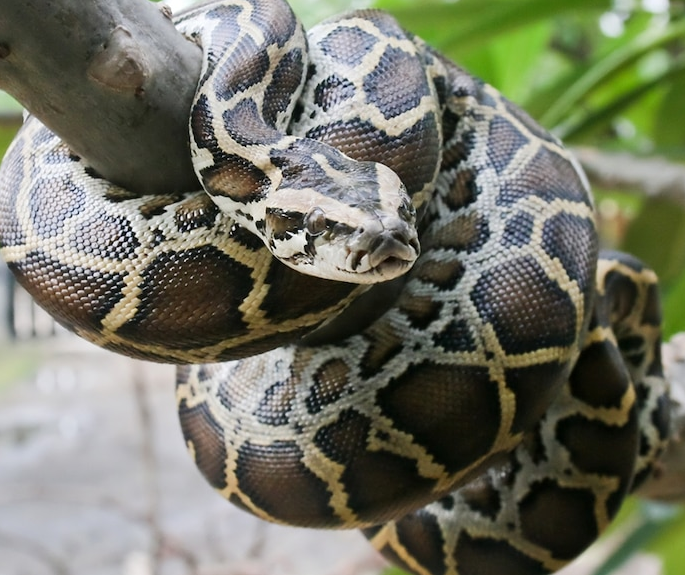

In [101]:
im2.crop((250, 50, im2.width-265, im2.height-50))

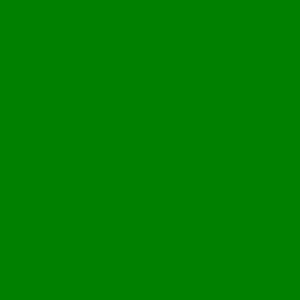

In [102]:
# creating a  blank image
gimg = Image.new('RGBA', (300, 300), 'green')
gimg

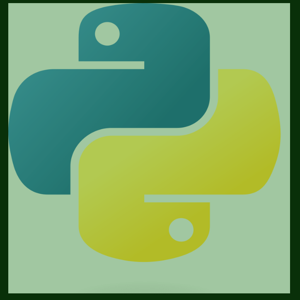

In [103]:
# blending images - Rule: same size and same format
# im11.mode
im111 = im11.resize(gimg.size)
im111 = im11.convert(gimg.mode)
# Image.blend(im11, gimg, 0.5)
Image.blend(im11, gimg, 0.3)
# Image.blend(im11, gimg, 0.8)

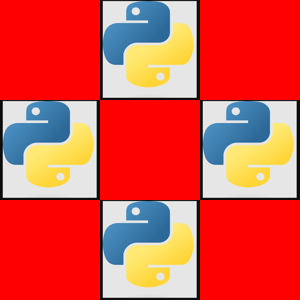

In [114]:
# paste image
# gimg2 = gimg.copy()
im111 = im11.resize((100,100))
rimg = Image.new("RGBA", (300, 300), 'red')
rimg.paste(im111, (100, 200))
rimg.paste(im111, (100, 0))
rimg.paste(im111, (0, 100))
rimg.paste(im111, (200, 100))
rimg

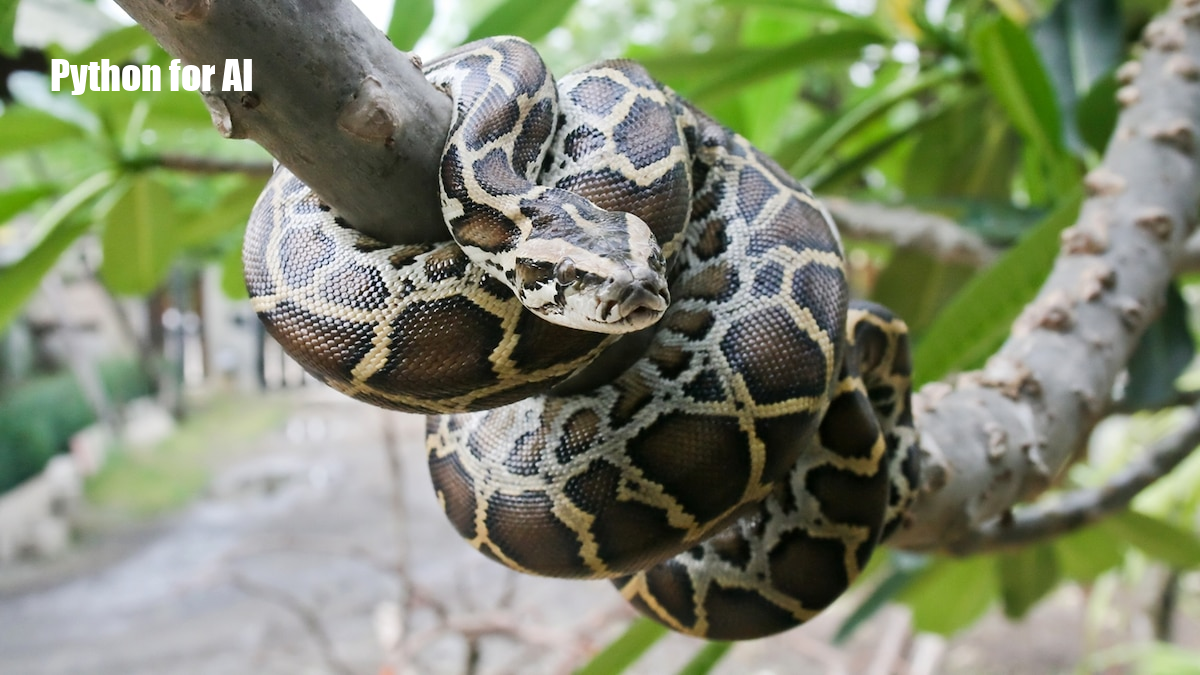

In [118]:
# drawing an image
im3 = im2.copy()
font = ImageFont.truetype(r'C:\Windows\\Fonts\\impact.ttf', 40)
draw = ImageDraw.Draw(im3)
msg = "Python for AI"
draw.text((50,50), msg, fill = "white", font=font)
im3